In [5]:
!pip3 install Pillow
!pip3 install pandas
!pip3 install http://download.pytorch.org/whl/cu91/torch-0.3.1-cp35-cp35m-linux_x86_64.whl 
!pip3 install torchvision

You are using pip version 9.0.1, however version 10.0.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 10.0.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 10.0.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 10.0.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [17]:
import base64
import shutil
import io
import os

import pandas as pd
from skimage.io import imread, imshow
from torchvision import transforms
from tqdm import trange, tqdm

from settings.paths import FACES_DATA, FILTERED_MS_CELEB_IMAGES_DIR, MS_CELEB_CLEAN_LIST, UNFILTERED_MS_CELEB_IMAGES_DIR, \
                           LFW_DIR, LFW_FUNNELED_DIR, LFW_PAIRS_6000
from utils import maybe_mkdir

In [7]:
!ls data

lfw  ms_celeb


# MS_CELEB

In [8]:
faces_data = pd.read_csv(FACES_DATA, delimiter='\t', header=None, chunksize = 1000)
next(faces_data).head(2)

,0,1,2,3,4,5,6
0,m.0107_f,0,http://getbeatmadrid.files.wordpress.com/2013/...,http://getbeatmadrid.wordpress.com/2013/01/28/...,FaceId-0,KsQsP3Pumj2B6UE/Vj4/Pg==,/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAQCAwMDAgQDAw...
1,m.0107_f,1,http://1.bp.blogspot.com/-HNFIL7eKdNs/TxnlvZvi...,http://plasticineportal.blogspot.com/2012/01/m...,FaceId-0,voT2Po1YFz5oL0E/qqqqPg==,/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAQCAwMDAgQDAw...


In [10]:
def str_to_image(string):
    return imread(
        io.BytesIO(
            base64.decodebytes(
                bytes(string, 'utf-8')
            )
        )
    )

In [11]:
reshape_central_128_crop = transforms.Compose(
    [
        transforms.ToPILImage(),
        transforms.Scale(128, 0),
        transforms.CenterCrop(128),
    ]
)

/usr/local/lib/python3.5/dist-packages/torchvision/transforms/transforms.py:156: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


### TSV to Images

In [12]:
def save_unfiltered_images_from_tsv(tsv_file_path, output_dir):
    maybe_mkdir(output_dir)
    
    tsv_file_chuncks = pd.read_csv(tsv_file_path, delimiter='\t', header=None, chunksize=100)
    
    for tsv_file in tqdm(tsv_file_chuncks):
        for _, row in tsv_file.iterrows():
            mid = row[0]
            number = row[1]
            face_id = row[4]
            
            image_name = '{}-{}.jpg'.format(number, face_id)
            
            face_image = str_to_image(row[6])
            face_image_crop = reshape_central_128_crop(face_image)

            person_dir = os.path.join(output_dir, mid)
            maybe_mkdir(person_dir)

            image_path = os.path.join(person_dir, image_name)

            face_image_crop.save(image_path, 'JPEG')

In [ ]:
save_unfiltered_images_from_tsv(FACES_DATA, UNFILTERED_MS_CELEB_IMAGES_DIR)

100it [00:00, 546.76it/s]
100it [00:00, 512.82it/s]
100it [00:00, 416.90it/s]
100it [00:00, 473.52it/s]
100it [00:00, 457.11it/s]
100it [00:00, 609.11it/s]
100it [00:00, 493.06it/s]
100it [00:00, 558.64it/s]
100it [00:00, 448.86it/s]
100it [00:00, 527.85it/s]
100it [00:00, 573.49it/s]
100it [00:00, 652.23it/s]
100it [00:00, 489.25it/s]
100it [00:00, 468.29it/s]
100it [00:00, 525.01it/s]
100it [00:00, 558.28it/s]
100it [00:00, 410.56it/s]
100it [00:00, 405.11it/s]
100it [00:00, 521.38it/s]
100it [00:00, 415.06it/s]
100it [00:00, 349.10it/s]
100it [00:00, 282.79it/s]
100it [00:00, 455.27it/s]
100it [00:00, 503.44it/s]
100it [00:00, 488.29it/s]
100it [00:00, 450.36it/s]
100it [00:00, 499.47it/s]
100it [00:00, 447.35it/s]
100it [00:00, 420.51it/s]
100it [00:00, 578.79it/s]
100it [00:00, 418.27it/s]
100it [00:00, 593.82it/s]
100it [00:00, 396.74it/s]
100it [00:00, 487.79it/s]
100it [00:00, 537.20it/s]
100it [00:00, 612.45it/s]
100it [00:00, 519.08it/s]
100it [00:00, 563.78it/s]
100it [00:00

100it [00:00, 425.02it/s]
100it [00:00, 333.38it/s]
100it [00:00, 354.21it/s]
100it [00:00, 491.05it/s]
100it [00:00, 439.29it/s]
100it [00:00, 442.15it/s]
100it [00:00, 394.82it/s]
100it [00:00, 472.57it/s]
100it [00:00, 481.40it/s]
100it [00:00, 518.55it/s]
100it [00:00, 352.55it/s]
100it [00:00, 391.46it/s]
100it [00:00, 501.91it/s]
100it [00:00, 327.65it/s]
100it [00:00, 331.31it/s]
100it [00:00, 450.69it/s]
100it [00:00, 467.50it/s]
100it [00:00, 342.48it/s]
100it [00:00, 441.43it/s]
100it [00:00, 521.83it/s]
100it [00:00, 539.75it/s]
100it [00:00, 446.51it/s]
100it [00:00, 332.21it/s]
100it [00:00, 538.26it/s]
100it [00:00, 512.95it/s]
100it [00:00, 461.25it/s]
100it [00:00, 500.04it/s]
100it [00:00, 504.12it/s]
100it [00:00, 506.58it/s]
100it [00:00, 495.38it/s]
100it [00:00, 428.77it/s]
100it [00:00, 425.43it/s]
100it [00:00, 468.12it/s]
100it [00:00, 440.74it/s]
100it [00:00, 410.86it/s]
100it [00:00, 433.66it/s]
100it [00:00, 508.94it/s]
100it [00:00, 535.36it/s]
100it [00:00

100it [00:00, 481.30it/s]
100it [00:00, 552.71it/s]
100it [00:00, 479.16it/s]
100it [00:00, 507.05it/s]
100it [00:00, 395.89it/s]
100it [00:00, 398.38it/s]
100it [00:00, 454.54it/s]
100it [00:00, 555.49it/s]
100it [00:00, 464.11it/s]
100it [00:00, 418.80it/s]
100it [00:00, 401.52it/s]
100it [00:00, 430.16it/s]
100it [00:00, 534.12it/s]
100it [00:00, 621.39it/s]
100it [00:00, 546.83it/s]
100it [00:00, 438.56it/s]
100it [00:00, 498.73it/s]
100it [00:00, 579.49it/s]
100it [00:00, 430.74it/s]
100it [00:00, 557.55it/s]
100it [00:00, 506.68it/s]
100it [00:00, 452.49it/s]
100it [00:00, 417.36it/s]
100it [00:00, 432.35it/s]
100it [00:00, 589.44it/s]
100it [00:00, 573.29it/s]
100it [00:00, 531.71it/s]
100it [00:00, 306.76it/s]
100it [00:00, 391.71it/s]
100it [00:00, 433.18it/s]
100it [00:00, 440.83it/s]
100it [00:00, 519.70it/s]
100it [00:00, 341.04it/s]
100it [00:00, 398.55it/s]
100it [00:00, 480.22it/s]
100it [00:00, 573.49it/s]
100it [00:00, 422.37it/s]
100it [00:00, 378.19it/s]
100it [00:00

100it [00:00, 463.49it/s]
100it [00:00, 520.82it/s]
100it [00:00, 501.24it/s]
100it [00:00, 353.99it/s]
100it [00:00, 411.08it/s]
100it [00:00, 450.27it/s]
100it [00:00, 433.71it/s]
100it [00:00, 415.15it/s]
100it [00:00, 435.79it/s]
100it [00:00, 492.10it/s]
100it [00:00, 517.16it/s]
100it [00:00, 512.47it/s]
100it [00:00, 525.47it/s]
100it [00:00, 498.12it/s]
100it [00:00, 397.48it/s]
100it [00:00, 579.81it/s]
100it [00:00, 511.38it/s]
100it [00:00, 474.81it/s]
100it [00:00, 516.76it/s]
100it [00:00, 502.04it/s]
100it [00:00, 425.14it/s]
100it [00:00, 541.05it/s]
100it [00:00, 466.65it/s]
100it [00:00, 524.41it/s]
100it [00:00, 542.26it/s]
100it [00:00, 475.10it/s]
100it [00:00, 544.14it/s]
100it [00:00, 626.06it/s]
100it [00:00, 504.42it/s]
100it [00:00, 420.38it/s]
100it [00:00, 410.68it/s]
100it [00:00, 448.95it/s]
100it [00:00, 407.55it/s]
100it [00:00, 512.33it/s]
100it [00:00, 458.37it/s]
100it [00:00, 447.85it/s]
100it [00:00, 523.63it/s]
100it [00:00, 597.84it/s]
100it [00:00

100it [00:00, 380.90it/s]
100it [00:00, 500.86it/s]
100it [00:00, 648.80it/s]
100it [00:00, 452.09it/s]
100it [00:00, 407.59it/s]
100it [00:00, 461.63it/s]
100it [00:00, 510.64it/s]
100it [00:00, 410.99it/s]
100it [00:00, 457.78it/s]
100it [00:00, 642.96it/s]
100it [00:00, 520.57it/s]
100it [00:00, 423.84it/s]
100it [00:00, 545.73it/s]
100it [00:00, 521.29it/s]
100it [00:00, 468.97it/s]
100it [00:00, 534.87it/s]
100it [00:00, 423.58it/s]
100it [00:00, 502.54it/s]
100it [00:00, 493.81it/s]
100it [00:00, 490.61it/s]
100it [00:00, 548.94it/s]
100it [00:00, 585.51it/s]
100it [00:00, 581.81it/s]
100it [00:00, 409.77it/s]
100it [00:00, 426.49it/s]
100it [00:00, 573.97it/s]
100it [00:00, 533.46it/s]
100it [00:00, 430.86it/s]
100it [00:00, 365.00it/s]
100it [00:00, 282.93it/s]
100it [00:00, 386.29it/s]
100it [00:00, 356.21it/s]
100it [00:00, 519.55it/s]
100it [00:00, 394.49it/s]
100it [00:00, 393.90it/s]
100it [00:00, 550.70it/s]
100it [00:00, 481.21it/s]
100it [00:00, 406.01it/s]
100it [00:00

100it [00:00, 509.36it/s]
100it [00:00, 529.17it/s]
100it [00:00, 681.16it/s]
100it [00:00, 619.73it/s]
100it [00:00, 564.78it/s]
100it [00:00, 477.08it/s]
100it [00:00, 503.47it/s]
100it [00:00, 511.10it/s]
100it [00:00, 459.13it/s]
100it [00:00, 533.92it/s]
100it [00:00, 396.11it/s]
100it [00:00, 415.97it/s]
100it [00:00, 439.13it/s]
100it [00:00, 359.99it/s]
100it [00:00, 441.93it/s]
100it [00:00, 418.84it/s]
100it [00:00, 563.06it/s]
100it [00:00, 481.76it/s]
100it [00:00, 510.90it/s]
100it [00:00, 395.95it/s]
100it [00:00, 428.01it/s]
100it [00:00, 508.61it/s]
100it [00:00, 401.22it/s]
100it [00:00, 313.85it/s]
100it [00:00, 395.76it/s]
100it [00:00, 382.13it/s]
100it [00:00, 424.44it/s]
100it [00:00, 409.35it/s]
100it [00:00, 538.05it/s]
100it [00:00, 422.91it/s]
100it [00:00, 427.92it/s]
100it [00:00, 362.97it/s]
100it [00:00, 343.55it/s]
100it [00:00, 428.82it/s]
100it [00:00, 470.17it/s]
100it [00:00, 498.04it/s]
100it [00:00, 533.08it/s]
100it [00:00, 672.75it/s]
100it [00:00

100it [00:00, 595.91it/s]
100it [00:00, 513.40it/s]
100it [00:00, 377.74it/s]
100it [00:00, 441.09it/s]
100it [00:00, 463.92it/s]
100it [00:00, 408.82it/s]
100it [00:00, 443.91it/s]
100it [00:00, 401.33it/s]
100it [00:00, 431.58it/s]
100it [00:00, 430.96it/s]
100it [00:00, 452.68it/s]
100it [00:00, 485.42it/s]
100it [00:00, 403.44it/s]
100it [00:00, 416.54it/s]
100it [00:00, 443.78it/s]
100it [00:00, 415.12it/s]
100it [00:00, 493.85it/s]
100it [00:00, 543.38it/s]
100it [00:00, 579.33it/s]
100it [00:00, 574.25it/s]
100it [00:00, 485.25it/s]
100it [00:00, 472.99it/s]
100it [00:00, 540.92it/s]
100it [00:00, 500.87it/s]
100it [00:00, 538.53it/s]
100it [00:00, 509.29it/s]
100it [00:00, 533.79it/s]
100it [00:00, 534.32it/s]
100it [00:00, 495.83it/s]
100it [00:00, 414.68it/s]
100it [00:00, 524.69it/s]
100it [00:00, 341.29it/s]
100it [00:00, 557.31it/s]
100it [00:00, 387.68it/s]
100it [00:00, 551.51it/s]
100it [00:00, 423.85it/s]
100it [00:00, 461.70it/s]
100it [00:00, 411.63it/s]
100it [00:00

100it [00:00, 382.61it/s]
100it [00:00, 374.46it/s]
100it [00:00, 511.36it/s]
100it [00:00, 574.35it/s]
100it [00:00, 615.57it/s]
100it [00:00, 582.46it/s]
100it [00:00, 501.78it/s]
100it [00:00, 407.53it/s]
100it [00:00, 518.03it/s]
100it [00:00, 386.27it/s]
100it [00:00, 442.37it/s]
100it [00:00, 470.18it/s]
100it [00:00, 438.24it/s]
100it [00:00, 488.39it/s]
100it [00:00, 487.27it/s]
100it [00:00, 578.03it/s]
100it [00:00, 573.41it/s]
100it [00:00, 466.42it/s]
100it [00:00, 459.79it/s]
100it [00:00, 442.76it/s]
100it [00:00, 569.67it/s]
100it [00:00, 490.41it/s]
100it [00:00, 512.30it/s]
100it [00:00, 585.23it/s]
100it [00:00, 559.75it/s]
100it [00:00, 568.87it/s]
100it [00:00, 397.22it/s]
100it [00:00, 483.17it/s]
100it [00:00, 570.53it/s]
100it [00:00, 414.90it/s]
100it [00:00, 525.18it/s]
100it [00:00, 435.38it/s]
100it [00:00, 479.44it/s]
100it [00:00, 471.69it/s]
100it [00:00, 574.26it/s]
100it [00:00, 589.04it/s]
100it [00:00, 374.63it/s]
100it [00:00, 560.41it/s]
100it [00:00

100it [00:00, 616.97it/s]
100it [00:00, 485.55it/s]
100it [00:00, 458.47it/s]
100it [00:00, 397.09it/s]
100it [00:00, 418.72it/s]
100it [00:00, 423.02it/s]
100it [00:00, 442.01it/s]
100it [00:00, 384.71it/s]
100it [00:00, 415.20it/s]
100it [00:00, 463.14it/s]
100it [00:00, 377.93it/s]
100it [00:00, 474.16it/s]
100it [00:00, 479.79it/s]
100it [00:00, 499.33it/s]
100it [00:00, 577.35it/s]
100it [00:00, 513.24it/s]
100it [00:00, 412.01it/s]
100it [00:00, 483.38it/s]
100it [00:00, 454.29it/s]
100it [00:00, 476.36it/s]
100it [00:00, 372.98it/s]
100it [00:00, 469.50it/s]
100it [00:00, 539.47it/s]
100it [00:00, 426.73it/s]
100it [00:00, 471.75it/s]
100it [00:00, 583.91it/s]
100it [00:00, 531.45it/s]
100it [00:00, 473.60it/s]
100it [00:00, 390.70it/s]
100it [00:00, 353.36it/s]
100it [00:00, 517.72it/s]
100it [00:00, 461.11it/s]
100it [00:00, 475.13it/s]
100it [00:00, 507.36it/s]
100it [00:00, 432.13it/s]
100it [00:00, 392.60it/s]
100it [00:00, 411.71it/s]
100it [00:00, 391.70it/s]
100it [00:00

100it [00:00, 378.64it/s]
100it [00:00, 579.61it/s]
100it [00:00, 629.95it/s]
100it [00:00, 405.19it/s]
100it [00:00, 362.48it/s]
100it [00:00, 430.66it/s]
100it [00:00, 564.44it/s]
100it [00:00, 506.56it/s]
100it [00:00, 526.50it/s]
100it [00:00, 397.17it/s]
100it [00:00, 456.75it/s]
100it [00:00, 358.08it/s]
100it [00:00, 443.21it/s]
100it [00:00, 542.67it/s]
100it [00:00, 464.65it/s]
100it [00:00, 523.56it/s]
100it [00:00, 507.69it/s]
100it [00:00, 536.58it/s]
100it [00:00, 556.65it/s]
100it [00:00, 434.20it/s]
100it [00:00, 601.55it/s]
100it [00:00, 428.23it/s]
100it [00:00, 435.35it/s]
100it [00:00, 557.76it/s]
100it [00:00, 630.87it/s]
100it [00:00, 407.66it/s]
100it [00:00, 445.80it/s]
100it [00:00, 536.52it/s]
100it [00:00, 505.28it/s]
100it [00:00, 415.99it/s]
100it [00:00, 445.99it/s]
100it [00:00, 568.66it/s]
100it [00:00, 464.69it/s]
100it [00:00, 382.01it/s]
100it [00:00, 456.08it/s]
100it [00:00, 459.06it/s]
100it [00:00, 644.34it/s]
100it [00:00, 406.29it/s]
100it [00:00

100it [00:00, 507.60it/s]
100it [00:00, 454.28it/s]
100it [00:00, 447.10it/s]
100it [00:00, 365.04it/s]
100it [00:00, 465.67it/s]
100it [00:00, 435.00it/s]
100it [00:00, 509.77it/s]
100it [00:00, 446.87it/s]
100it [00:00, 517.80it/s]
100it [00:00, 509.64it/s]
100it [00:00, 456.61it/s]
100it [00:00, 500.78it/s]
100it [00:00, 470.76it/s]
100it [00:00, 569.48it/s]
100it [00:00, 410.60it/s]
100it [00:00, 475.12it/s]
100it [00:00, 418.71it/s]
100it [00:00, 425.37it/s]
100it [00:00, 436.07it/s]
100it [00:00, 535.39it/s]
100it [00:00, 551.83it/s]
100it [00:00, 542.49it/s]
100it [00:00, 590.29it/s]
100it [00:00, 589.45it/s]
100it [00:00, 555.15it/s]
100it [00:00, 485.98it/s]
100it [00:00, 411.34it/s]
100it [00:00, 410.92it/s]
100it [00:00, 399.08it/s]
100it [00:00, 516.83it/s]
100it [00:00, 426.52it/s]
100it [00:00, 455.40it/s]
100it [00:00, 385.23it/s]
100it [00:00, 407.36it/s]
100it [00:00, 469.39it/s]
100it [00:00, 486.21it/s]
100it [00:00, 367.18it/s]
100it [00:00, 490.63it/s]
100it [00:00

100it [00:00, 385.63it/s]
100it [00:00, 414.70it/s]
100it [00:00, 477.64it/s]
100it [00:00, 474.13it/s]
100it [00:00, 459.05it/s]
100it [00:00, 510.11it/s]
100it [00:00, 520.62it/s]
100it [00:00, 424.43it/s]
100it [00:00, 344.24it/s]
100it [00:00, 410.95it/s]
100it [00:00, 482.89it/s]
100it [00:00, 522.59it/s]
100it [00:00, 498.65it/s]
100it [00:00, 422.04it/s]
100it [00:00, 438.80it/s]
100it [00:00, 399.52it/s]
100it [00:00, 544.65it/s]
100it [00:00, 401.20it/s]
100it [00:00, 391.38it/s]
100it [00:00, 544.53it/s]
100it [00:00, 518.80it/s]
100it [00:00, 554.38it/s]
100it [00:00, 370.19it/s]
100it [00:00, 413.77it/s]
100it [00:00, 542.01it/s]
100it [00:00, 486.07it/s]
100it [00:00, 472.75it/s]
100it [00:00, 523.75it/s]
100it [00:00, 423.21it/s]
100it [00:00, 523.79it/s]
100it [00:00, 386.85it/s]
100it [00:00, 477.78it/s]
100it [00:00, 513.85it/s]
100it [00:00, 607.90it/s]
100it [00:00, 454.15it/s]
100it [00:00, 434.57it/s]
100it [00:00, 561.94it/s]
100it [00:00, 571.33it/s]
100it [00:00

100it [00:00, 503.63it/s]
100it [00:00, 503.92it/s]
100it [00:00, 427.83it/s]
100it [00:00, 534.62it/s]
100it [00:00, 385.20it/s]
100it [00:00, 429.59it/s]
100it [00:00, 462.66it/s]
100it [00:00, 545.40it/s]
100it [00:00, 541.02it/s]
100it [00:00, 504.51it/s]
100it [00:00, 484.36it/s]
100it [00:00, 503.31it/s]
100it [00:00, 436.49it/s]
100it [00:00, 537.68it/s]
100it [00:00, 464.10it/s]
100it [00:00, 557.98it/s]
100it [00:00, 519.54it/s]
100it [00:00, 635.69it/s]
100it [00:00, 420.17it/s]
100it [00:00, 406.77it/s]
100it [00:00, 547.80it/s]
100it [00:00, 450.81it/s]
100it [00:00, 449.07it/s]
100it [00:00, 489.62it/s]
100it [00:00, 389.52it/s]
100it [00:00, 536.22it/s]
100it [00:00, 460.99it/s]
100it [00:00, 444.51it/s]
100it [00:00, 612.52it/s]
100it [00:00, 528.61it/s]
100it [00:00, 440.13it/s]
100it [00:00, 538.24it/s]
100it [00:00, 559.59it/s]
100it [00:00, 551.48it/s]
100it [00:00, 562.78it/s]
100it [00:00, 600.76it/s]
100it [00:00, 577.76it/s]
100it [00:00, 566.17it/s]
100it [00:00

100it [00:00, 504.59it/s]
100it [00:00, 567.58it/s]
100it [00:00, 569.24it/s]
100it [00:00, 379.55it/s]
100it [00:00, 485.28it/s]
100it [00:00, 432.60it/s]
100it [00:00, 438.51it/s]
100it [00:00, 419.71it/s]
100it [00:00, 514.43it/s]
100it [00:00, 595.75it/s]
100it [00:00, 402.59it/s]
100it [00:00, 423.81it/s]
100it [00:00, 347.33it/s]
100it [00:00, 432.75it/s]
100it [00:00, 466.64it/s]
100it [00:00, 564.63it/s]
100it [00:00, 536.78it/s]
100it [00:00, 523.84it/s]
100it [00:00, 466.96it/s]
100it [00:00, 535.16it/s]
100it [00:00, 481.72it/s]
100it [00:00, 499.02it/s]
100it [00:00, 366.49it/s]
100it [00:00, 407.75it/s]
100it [00:00, 380.78it/s]
100it [00:00, 436.73it/s]
100it [00:00, 427.69it/s]
100it [00:00, 450.84it/s]
100it [00:00, 538.40it/s]
100it [00:00, 449.88it/s]
100it [00:00, 474.73it/s]
100it [00:00, 389.90it/s]
100it [00:00, 341.59it/s]
100it [00:00, 443.42it/s]
100it [00:00, 390.98it/s]
100it [00:00, 520.38it/s]
100it [00:00, 643.22it/s]
100it [00:00, 421.79it/s]
100it [00:00

100it [00:00, 465.67it/s]
100it [00:00, 458.38it/s]
100it [00:00, 498.94it/s]
100it [00:00, 637.89it/s]
100it [00:00, 543.28it/s]
100it [00:00, 415.92it/s]
100it [00:00, 479.34it/s]
100it [00:00, 444.33it/s]
100it [00:00, 443.93it/s]
100it [00:00, 523.55it/s]
100it [00:00, 424.34it/s]
100it [00:00, 531.22it/s]
100it [00:00, 575.18it/s]
100it [00:00, 578.88it/s]
100it [00:00, 468.95it/s]
100it [00:00, 459.50it/s]
100it [00:00, 651.13it/s]
100it [00:00, 533.48it/s]
100it [00:00, 589.09it/s]
100it [00:00, 579.95it/s]
100it [00:00, 487.46it/s]
100it [00:00, 525.17it/s]
100it [00:00, 450.51it/s]
100it [00:00, 428.35it/s]
100it [00:00, 476.02it/s]
100it [00:00, 584.66it/s]
100it [00:00, 615.25it/s]
100it [00:00, 616.50it/s]
100it [00:00, 576.70it/s]
100it [00:00, 580.87it/s]
100it [00:00, 447.95it/s]
100it [00:00, 542.75it/s]
100it [00:00, 504.47it/s]
100it [00:00, 450.23it/s]
100it [00:00, 563.14it/s]
100it [00:00, 459.67it/s]
100it [00:00, 511.39it/s]
100it [00:00, 462.86it/s]
100it [00:00

100it [00:00, 525.78it/s]
100it [00:00, 519.07it/s]
100it [00:00, 509.05it/s]
100it [00:00, 639.73it/s]
100it [00:00, 460.96it/s]
100it [00:00, 415.20it/s]
100it [00:00, 431.19it/s]
100it [00:00, 351.08it/s]
100it [00:00, 402.23it/s]
100it [00:00, 501.79it/s]
100it [00:00, 529.05it/s]
100it [00:00, 571.99it/s]
100it [00:00, 521.77it/s]
100it [00:00, 576.38it/s]
100it [00:00, 461.24it/s]
100it [00:00, 524.47it/s]
100it [00:00, 526.22it/s]
100it [00:00, 553.18it/s]
100it [00:00, 536.55it/s]
100it [00:00, 562.34it/s]
100it [00:00, 596.73it/s]
100it [00:00, 657.02it/s]
100it [00:00, 653.96it/s]
100it [00:00, 543.61it/s]
100it [00:00, 571.90it/s]
100it [00:00, 583.24it/s]
100it [00:00, 616.53it/s]
100it [00:00, 570.56it/s]
100it [00:00, 505.72it/s]
100it [00:00, 519.66it/s]
100it [00:00, 523.41it/s]
100it [00:00, 446.52it/s]
100it [00:00, 453.06it/s]
100it [00:00, 543.58it/s]
100it [00:00, 550.48it/s]
100it [00:00, 484.32it/s]
100it [00:00, 580.24it/s]
100it [00:00, 385.61it/s]
100it [00:00

100it [00:00, 589.48it/s]
100it [00:00, 606.95it/s]
100it [00:00, 587.05it/s]
100it [00:00, 521.01it/s]
100it [00:00, 609.55it/s]
100it [00:00, 444.79it/s]
100it [00:00, 467.78it/s]
100it [00:00, 519.04it/s]
100it [00:00, 428.73it/s]
100it [00:00, 587.34it/s]
100it [00:00, 445.21it/s]
100it [00:00, 406.33it/s]
100it [00:00, 416.28it/s]
100it [00:00, 516.56it/s]
100it [00:00, 480.77it/s]
100it [00:00, 434.86it/s]
100it [00:00, 588.65it/s]
100it [00:00, 590.78it/s]
100it [00:00, 603.71it/s]
100it [00:00, 334.38it/s]
100it [00:00, 342.88it/s]
100it [00:00, 412.17it/s]
100it [00:00, 437.97it/s]
100it [00:00, 429.42it/s]
100it [00:00, 512.81it/s]
100it [00:00, 434.93it/s]
100it [00:00, 507.68it/s]
100it [00:00, 531.11it/s]
100it [00:00, 456.74it/s]
100it [00:00, 509.48it/s]
100it [00:00, 442.78it/s]
100it [00:00, 528.43it/s]
100it [00:00, 502.74it/s]
100it [00:00, 448.92it/s]
100it [00:00, 414.57it/s]
100it [00:00, 489.76it/s]
100it [00:00, 509.63it/s]
100it [00:00, 423.25it/s]
100it [00:00

100it [00:00, 587.99it/s]
100it [00:00, 604.82it/s]
100it [00:00, 585.83it/s]
100it [00:00, 612.80it/s]
100it [00:00, 626.54it/s]
100it [00:00, 487.82it/s]
100it [00:00, 441.77it/s]
100it [00:00, 445.34it/s]
100it [00:00, 418.86it/s]
100it [00:00, 395.58it/s]
100it [00:00, 428.75it/s]
100it [00:00, 362.70it/s]
100it [00:00, 443.04it/s]
100it [00:00, 517.02it/s]
100it [00:00, 448.04it/s]
100it [00:00, 502.13it/s]
100it [00:00, 408.82it/s]
100it [00:00, 423.64it/s]
100it [00:00, 436.67it/s]
100it [00:00, 469.09it/s]
100it [00:00, 561.62it/s]
100it [00:00, 594.54it/s]
100it [00:00, 389.51it/s]
100it [00:00, 529.68it/s]
100it [00:00, 373.86it/s]
100it [00:00, 500.76it/s]
100it [00:00, 505.68it/s]
100it [00:00, 581.16it/s]
100it [00:00, 419.70it/s]
100it [00:00, 472.16it/s]
100it [00:00, 447.26it/s]
100it [00:00, 374.09it/s]
100it [00:00, 402.52it/s]
100it [00:00, 510.76it/s]
100it [00:00, 551.00it/s]
100it [00:00, 497.39it/s]
100it [00:00, 484.82it/s]
100it [00:00, 539.61it/s]
100it [00:00

100it [00:00, 501.29it/s]
100it [00:00, 561.98it/s]
100it [00:00, 722.74it/s]
100it [00:00, 554.81it/s]
100it [00:00, 487.73it/s]
100it [00:00, 554.39it/s]
100it [00:00, 618.15it/s]
100it [00:00, 657.22it/s]
100it [00:00, 587.77it/s]
100it [00:00, 526.61it/s]
100it [00:00, 645.86it/s]
100it [00:00, 586.65it/s]
100it [00:00, 364.26it/s]
100it [00:00, 477.10it/s]
100it [00:00, 539.57it/s]
100it [00:00, 559.43it/s]
100it [00:00, 554.81it/s]
100it [00:00, 474.04it/s]
100it [00:00, 378.92it/s]
100it [00:00, 348.83it/s]
100it [00:00, 560.12it/s]
100it [00:00, 435.02it/s]
100it [00:00, 338.90it/s]
100it [00:00, 466.61it/s]
100it [00:00, 561.22it/s]
100it [00:00, 472.82it/s]
100it [00:00, 373.28it/s]
100it [00:00, 448.99it/s]
100it [00:00, 374.52it/s]
100it [00:00, 556.40it/s]
100it [00:00, 565.50it/s]
100it [00:00, 587.26it/s]
100it [00:00, 498.15it/s]
100it [00:00, 469.76it/s]
100it [00:00, 454.85it/s]
100it [00:00, 442.18it/s]
100it [00:00, 514.32it/s]
100it [00:00, 479.06it/s]
100it [00:00

100it [00:00, 675.87it/s]
100it [00:00, 602.79it/s]
100it [00:00, 616.06it/s]
100it [00:00, 380.80it/s]
100it [00:00, 558.50it/s]
100it [00:00, 587.11it/s]
100it [00:00, 551.80it/s]
100it [00:00, 348.86it/s]
100it [00:00, 419.39it/s]
100it [00:00, 638.25it/s]
100it [00:00, 609.44it/s]
100it [00:00, 520.24it/s]
100it [00:00, 639.82it/s]
100it [00:00, 598.98it/s]
100it [00:00, 526.74it/s]
100it [00:00, 565.43it/s]
100it [00:00, 623.41it/s]
100it [00:00, 576.80it/s]
100it [00:00, 644.29it/s]
100it [00:00, 570.47it/s]
100it [00:00, 413.11it/s]
100it [00:00, 445.91it/s]
100it [00:00, 397.55it/s]
100it [00:00, 434.75it/s]
100it [00:00, 471.83it/s]
100it [00:00, 378.30it/s]
100it [00:00, 526.61it/s]
100it [00:00, 511.33it/s]
100it [00:00, 465.66it/s]
100it [00:00, 447.67it/s]
100it [00:00, 542.94it/s]
100it [00:00, 449.28it/s]
100it [00:00, 609.56it/s]
100it [00:00, 555.82it/s]
100it [00:00, 612.95it/s]
100it [00:00, 514.58it/s]
100it [00:00, 520.39it/s]
100it [00:00, 555.97it/s]
100it [00:00

100it [00:00, 480.65it/s]
100it [00:00, 589.55it/s]
100it [00:00, 599.35it/s]
100it [00:00, 518.45it/s]
100it [00:00, 531.79it/s]
100it [00:00, 398.06it/s]
100it [00:00, 507.87it/s]
100it [00:00, 469.22it/s]
100it [00:00, 672.03it/s]
100it [00:00, 477.44it/s]
100it [00:00, 377.18it/s]
100it [00:00, 440.61it/s]
100it [00:00, 534.51it/s]
100it [00:00, 388.73it/s]
100it [00:00, 468.68it/s]
100it [00:00, 439.73it/s]
100it [00:00, 475.60it/s]
100it [00:00, 475.60it/s]
100it [00:00, 505.92it/s]
100it [00:00, 623.51it/s]
100it [00:00, 555.87it/s]
100it [00:00, 563.72it/s]
100it [00:00, 547.80it/s]
100it [00:00, 583.61it/s]
100it [00:00, 467.65it/s]
100it [00:00, 487.42it/s]
100it [00:00, 357.52it/s]
100it [00:00, 377.87it/s]
100it [00:00, 405.25it/s]
100it [00:00, 400.10it/s]
100it [00:00, 437.49it/s]
100it [00:00, 552.07it/s]
100it [00:00, 551.85it/s]
100it [00:00, 642.33it/s]
100it [00:00, 592.84it/s]
100it [00:00, 365.91it/s]
100it [00:00, 436.68it/s]
100it [00:00, 559.76it/s]
100it [00:00

100it [00:00, 455.79it/s]
100it [00:00, 470.55it/s]
100it [00:00, 318.76it/s]
100it [00:00, 429.55it/s]
100it [00:00, 537.82it/s]
100it [00:00, 586.55it/s]
100it [00:00, 485.60it/s]
100it [00:00, 383.09it/s]
100it [00:00, 456.74it/s]
100it [00:00, 431.25it/s]
100it [00:00, 383.50it/s]
100it [00:00, 499.69it/s]
100it [00:00, 537.13it/s]
100it [00:00, 336.71it/s]
100it [00:00, 505.39it/s]
100it [00:00, 346.41it/s]
100it [00:00, 480.01it/s]
100it [00:00, 582.53it/s]
100it [00:00, 475.30it/s]
100it [00:00, 437.64it/s]
100it [00:00, 592.59it/s]
100it [00:00, 424.46it/s]
100it [00:00, 541.13it/s]
100it [00:00, 351.42it/s]
100it [00:00, 369.72it/s]
100it [00:00, 402.08it/s]
100it [00:00, 374.93it/s]
100it [00:00, 393.15it/s]
100it [00:00, 466.78it/s]
100it [00:00, 445.69it/s]
100it [00:00, 401.09it/s]
100it [00:00, 350.54it/s]
100it [00:00, 400.77it/s]
100it [00:00, 369.18it/s]
100it [00:00, 370.41it/s]
100it [00:00, 490.53it/s]
100it [00:00, 462.82it/s]
100it [00:00, 600.33it/s]
100it [00:00

100it [00:00, 395.80it/s]
100it [00:00, 466.93it/s]
100it [00:00, 686.52it/s]
100it [00:00, 557.49it/s]
100it [00:00, 387.75it/s]
100it [00:00, 425.15it/s]
100it [00:00, 554.65it/s]
100it [00:00, 436.76it/s]
100it [00:00, 421.99it/s]
100it [00:00, 466.59it/s]
100it [00:00, 353.76it/s]
100it [00:00, 459.91it/s]
100it [00:00, 460.64it/s]
100it [00:00, 532.47it/s]
100it [00:00, 374.59it/s]
100it [00:00, 473.46it/s]
100it [00:00, 631.83it/s]
100it [00:00, 475.89it/s]
100it [00:00, 504.30it/s]
100it [00:00, 503.20it/s]
100it [00:00, 513.48it/s]
100it [00:00, 445.47it/s]
100it [00:00, 523.05it/s]
100it [00:00, 512.30it/s]
100it [00:00, 405.35it/s]
100it [00:00, 363.47it/s]
100it [00:00, 391.94it/s]
100it [00:00, 550.85it/s]
100it [00:00, 458.27it/s]
100it [00:00, 526.01it/s]
100it [00:00, 507.74it/s]
100it [00:00, 393.86it/s]
100it [00:00, 463.05it/s]
100it [00:00, 377.09it/s]
100it [00:00, 414.58it/s]
100it [00:00, 463.62it/s]
100it [00:00, 396.34it/s]
100it [00:00, 344.63it/s]
100it [00:00

100it [00:00, 461.38it/s]
100it [00:00, 539.66it/s]
100it [00:00, 446.20it/s]
100it [00:00, 511.20it/s]
100it [00:00, 433.26it/s]
100it [00:00, 409.33it/s]
100it [00:00, 416.55it/s]
100it [00:00, 465.81it/s]
100it [00:00, 515.14it/s]
100it [00:00, 525.64it/s]
100it [00:00, 392.10it/s]
100it [00:00, 375.75it/s]
100it [00:00, 394.29it/s]
100it [00:00, 572.48it/s]
100it [00:00, 361.08it/s]
100it [00:00, 460.66it/s]
100it [00:00, 479.80it/s]
100it [00:00, 471.35it/s]
100it [00:00, 490.72it/s]
100it [00:00, 625.15it/s]
100it [00:00, 380.14it/s]
100it [00:00, 399.83it/s]
100it [00:00, 311.58it/s]
100it [00:00, 368.49it/s]
100it [00:00, 435.76it/s]
100it [00:00, 430.99it/s]
100it [00:00, 531.96it/s]
100it [00:00, 573.26it/s]
100it [00:00, 397.22it/s]
100it [00:00, 499.04it/s]
100it [00:00, 441.71it/s]
100it [00:00, 325.28it/s]
100it [00:00, 444.60it/s]
100it [00:00, 411.19it/s]
100it [00:00, 371.96it/s]
100it [00:00, 421.51it/s]
100it [00:00, 410.68it/s]
100it [00:00, 441.01it/s]
100it [00:00

100it [00:00, 586.61it/s]
100it [00:00, 588.62it/s]
100it [00:00, 417.40it/s]
100it [00:00, 501.18it/s]
100it [00:00, 555.32it/s]
100it [00:00, 500.00it/s]
100it [00:00, 610.93it/s]
100it [00:00, 407.99it/s]
100it [00:00, 370.52it/s]
100it [00:00, 405.10it/s]
100it [00:00, 521.81it/s]
100it [00:00, 358.89it/s]
100it [00:00, 416.22it/s]
100it [00:00, 606.50it/s]
100it [00:00, 560.29it/s]
100it [00:00, 348.99it/s]
100it [00:00, 422.16it/s]
100it [00:00, 411.93it/s]
100it [00:00, 569.34it/s]
100it [00:00, 576.11it/s]
100it [00:00, 436.94it/s]
100it [00:00, 511.98it/s]
100it [00:00, 648.04it/s]
100it [00:00, 698.23it/s]
100it [00:00, 654.32it/s]
100it [00:00, 523.47it/s]
100it [00:00, 590.91it/s]
100it [00:00, 616.31it/s]
100it [00:00, 480.02it/s]
100it [00:00, 551.78it/s]
100it [00:00, 628.73it/s]
100it [00:00, 550.64it/s]
100it [00:00, 600.84it/s]
100it [00:00, 415.27it/s]
100it [00:00, 505.53it/s]
100it [00:00, 540.09it/s]
100it [00:00, 519.87it/s]
100it [00:00, 591.88it/s]
100it [00:00

100it [00:00, 455.19it/s]
100it [00:00, 405.37it/s]
100it [00:00, 486.27it/s]
100it [00:00, 519.60it/s]
100it [00:00, 557.28it/s]
100it [00:00, 596.31it/s]
100it [00:00, 574.53it/s]
100it [00:00, 514.46it/s]
100it [00:00, 536.44it/s]
100it [00:00, 376.69it/s]
100it [00:00, 473.05it/s]
100it [00:00, 527.04it/s]
100it [00:00, 479.20it/s]
100it [00:00, 615.14it/s]
100it [00:00, 519.10it/s]
100it [00:00, 610.53it/s]
100it [00:00, 596.97it/s]
100it [00:00, 606.79it/s]
100it [00:00, 563.03it/s]
100it [00:00, 462.55it/s]
100it [00:00, 509.64it/s]
100it [00:00, 507.84it/s]
100it [00:00, 452.57it/s]
100it [00:00, 525.41it/s]
100it [00:00, 465.21it/s]
100it [00:00, 416.60it/s]
100it [00:00, 463.60it/s]
100it [00:00, 564.06it/s]
100it [00:00, 564.89it/s]
100it [00:00, 527.66it/s]
100it [00:00, 446.90it/s]
100it [00:00, 569.53it/s]
100it [00:00, 563.35it/s]
100it [00:00, 635.83it/s]
100it [00:00, 623.26it/s]
100it [00:00, 452.83it/s]
100it [00:00, 550.61it/s]
100it [00:00, 563.55it/s]
100it [00:00

100it [00:00, 445.94it/s]
100it [00:00, 486.68it/s]
100it [00:00, 427.15it/s]
100it [00:00, 473.39it/s]
100it [00:00, 378.96it/s]
100it [00:00, 439.83it/s]
100it [00:00, 430.85it/s]
100it [00:00, 484.71it/s]
100it [00:00, 412.38it/s]
100it [00:00, 360.38it/s]
100it [00:00, 453.22it/s]
100it [00:00, 542.62it/s]
100it [00:00, 488.01it/s]
100it [00:00, 523.61it/s]
100it [00:00, 600.00it/s]
100it [00:00, 485.08it/s]
100it [00:00, 508.91it/s]
100it [00:00, 622.46it/s]
100it [00:00, 512.28it/s]
100it [00:00, 507.36it/s]
100it [00:00, 524.01it/s]
100it [00:00, 363.89it/s]
100it [00:00, 380.70it/s]
100it [00:00, 400.52it/s]
100it [00:00, 457.47it/s]
100it [00:00, 467.74it/s]
100it [00:00, 463.76it/s]
100it [00:00, 411.39it/s]
100it [00:00, 400.58it/s]
100it [00:00, 519.42it/s]
100it [00:00, 408.22it/s]
100it [00:00, 468.72it/s]
100it [00:00, 460.77it/s]
100it [00:00, 537.04it/s]
100it [00:00, 560.96it/s]
100it [00:00, 546.80it/s]
100it [00:00, 610.25it/s]
100it [00:00, 513.05it/s]
100it [00:00

100it [00:00, 435.22it/s]
100it [00:00, 416.47it/s]
100it [00:00, 636.27it/s]
100it [00:00, 508.69it/s]
100it [00:00, 341.44it/s]
100it [00:00, 405.96it/s]
100it [00:00, 540.45it/s]
100it [00:00, 582.14it/s]
100it [00:00, 547.32it/s]
100it [00:00, 420.94it/s]
100it [00:00, 508.83it/s]
100it [00:00, 479.29it/s]
100it [00:00, 540.36it/s]
100it [00:00, 605.29it/s]
100it [00:00, 528.72it/s]
100it [00:00, 457.01it/s]
100it [00:00, 535.72it/s]
100it [00:00, 532.54it/s]
100it [00:00, 434.57it/s]
100it [00:00, 406.29it/s]
100it [00:00, 441.86it/s]
100it [00:00, 621.00it/s]
100it [00:00, 480.95it/s]
100it [00:00, 556.02it/s]
100it [00:00, 570.80it/s]
100it [00:00, 483.08it/s]
100it [00:00, 506.98it/s]
100it [00:00, 473.15it/s]
100it [00:00, 571.96it/s]
100it [00:00, 507.50it/s]
100it [00:00, 515.06it/s]
100it [00:00, 611.43it/s]
100it [00:00, 617.47it/s]
100it [00:00, 578.75it/s]
100it [00:00, 430.35it/s]
100it [00:00, 516.77it/s]
100it [00:00, 561.39it/s]
100it [00:00, 507.77it/s]
100it [00:00

100it [00:00, 402.67it/s]
100it [00:00, 500.43it/s]
100it [00:00, 498.99it/s]
100it [00:00, 510.66it/s]
100it [00:00, 550.57it/s]
100it [00:00, 492.05it/s]
100it [00:00, 577.64it/s]
100it [00:00, 617.84it/s]
100it [00:00, 506.66it/s]
100it [00:00, 342.52it/s]
100it [00:00, 364.50it/s]
100it [00:00, 564.30it/s]
100it [00:00, 529.76it/s]
100it [00:00, 485.53it/s]
100it [00:00, 483.01it/s]
100it [00:00, 510.04it/s]
100it [00:00, 442.13it/s]
100it [00:00, 507.19it/s]
100it [00:00, 368.36it/s]
100it [00:00, 427.11it/s]
100it [00:00, 438.17it/s]
100it [00:00, 439.35it/s]
100it [00:00, 546.54it/s]
100it [00:00, 485.88it/s]
100it [00:00, 522.51it/s]
100it [00:00, 488.07it/s]
100it [00:00, 537.68it/s]
100it [00:00, 484.72it/s]
100it [00:00, 615.00it/s]
100it [00:00, 506.94it/s]
100it [00:00, 405.41it/s]
100it [00:00, 438.50it/s]
100it [00:00, 403.37it/s]
100it [00:00, 529.24it/s]
100it [00:00, 582.48it/s]
100it [00:00, 436.60it/s]
100it [00:00, 521.74it/s]
100it [00:00, 447.42it/s]
100it [00:00

100it [00:00, 389.28it/s]
100it [00:00, 366.40it/s]
100it [00:00, 388.68it/s]
100it [00:00, 505.31it/s]
100it [00:00, 556.20it/s]
100it [00:00, 448.04it/s]
100it [00:00, 482.93it/s]
100it [00:00, 376.80it/s]
100it [00:00, 499.09it/s]
100it [00:00, 445.68it/s]
100it [00:00, 378.52it/s]
100it [00:00, 417.49it/s]
100it [00:00, 544.35it/s]
100it [00:00, 490.16it/s]
100it [00:00, 524.17it/s]
100it [00:00, 476.58it/s]
100it [00:00, 398.83it/s]
100it [00:00, 381.73it/s]
100it [00:00, 414.23it/s]
100it [00:00, 452.02it/s]
100it [00:00, 485.72it/s]
100it [00:00, 377.24it/s]
100it [00:00, 421.93it/s]
100it [00:00, 387.09it/s]
100it [00:00, 506.09it/s]
100it [00:00, 464.35it/s]
100it [00:00, 474.70it/s]
100it [00:00, 565.22it/s]
100it [00:00, 493.82it/s]
100it [00:00, 424.54it/s]
100it [00:00, 462.43it/s]
100it [00:00, 586.68it/s]
100it [00:00, 607.59it/s]
100it [00:00, 598.76it/s]
100it [00:00, 387.90it/s]
100it [00:00, 447.91it/s]
100it [00:00, 486.66it/s]
100it [00:00, 395.27it/s]
100it [00:00

100it [00:00, 436.75it/s]
100it [00:00, 400.26it/s]
100it [00:00, 548.24it/s]
100it [00:00, 438.97it/s]
100it [00:00, 495.59it/s]
100it [00:00, 484.86it/s]
100it [00:00, 447.14it/s]
100it [00:00, 375.69it/s]
100it [00:00, 387.40it/s]
100it [00:00, 509.57it/s]
100it [00:00, 464.20it/s]
100it [00:00, 406.80it/s]
100it [00:00, 482.34it/s]
100it [00:00, 447.95it/s]
100it [00:00, 478.65it/s]
100it [00:00, 401.46it/s]
100it [00:00, 463.37it/s]
100it [00:00, 489.96it/s]
100it [00:00, 523.07it/s]
100it [00:00, 615.87it/s]
100it [00:00, 445.07it/s]
100it [00:00, 334.59it/s]
100it [00:00, 480.44it/s]
100it [00:00, 442.92it/s]
100it [00:00, 415.09it/s]
100it [00:00, 459.70it/s]
100it [00:00, 540.96it/s]
100it [00:00, 564.43it/s]
100it [00:00, 522.28it/s]
100it [00:00, 331.63it/s]
100it [00:00, 444.66it/s]
100it [00:00, 444.88it/s]
100it [00:00, 432.43it/s]
100it [00:00, 423.82it/s]
100it [00:00, 551.33it/s]
100it [00:00, 513.85it/s]
100it [00:00, 608.47it/s]
100it [00:00, 569.98it/s]
100it [00:00

100it [00:00, 501.63it/s]
100it [00:00, 429.35it/s]
100it [00:00, 498.92it/s]
100it [00:00, 485.37it/s]
100it [00:00, 540.28it/s]
100it [00:00, 414.62it/s]
100it [00:00, 492.06it/s]
100it [00:00, 429.64it/s]
100it [00:00, 453.54it/s]
100it [00:00, 530.81it/s]
100it [00:00, 402.67it/s]
100it [00:00, 351.71it/s]
100it [00:00, 409.88it/s]
100it [00:00, 460.72it/s]
100it [00:00, 373.25it/s]
100it [00:00, 472.29it/s]
100it [00:00, 438.60it/s]
100it [00:00, 436.48it/s]
100it [00:00, 566.28it/s]
100it [00:00, 530.61it/s]
100it [00:00, 573.40it/s]
100it [00:00, 613.09it/s]
100it [00:00, 475.02it/s]
100it [00:00, 506.93it/s]
100it [00:00, 434.19it/s]
100it [00:00, 439.77it/s]
100it [00:00, 650.01it/s]
100it [00:00, 549.59it/s]
100it [00:00, 607.74it/s]
100it [00:00, 580.00it/s]
100it [00:00, 567.00it/s]
100it [00:00, 547.51it/s]
100it [00:00, 641.57it/s]
100it [00:00, 607.92it/s]
100it [00:00, 504.31it/s]
100it [00:00, 589.22it/s]
100it [00:00, 514.62it/s]
100it [00:00, 497.77it/s]
100it [00:00

100it [00:00, 501.79it/s]
100it [00:00, 518.76it/s]
100it [00:00, 571.43it/s]
100it [00:00, 498.91it/s]
100it [00:00, 291.46it/s]
100it [00:00, 434.69it/s]
100it [00:00, 455.88it/s]
100it [00:00, 456.29it/s]
100it [00:00, 398.76it/s]
100it [00:00, 550.77it/s]
100it [00:00, 665.60it/s]
100it [00:00, 539.27it/s]
100it [00:00, 504.82it/s]
100it [00:00, 655.68it/s]
100it [00:00, 536.06it/s]
100it [00:00, 557.02it/s]
100it [00:00, 525.88it/s]
100it [00:00, 465.27it/s]
100it [00:00, 517.18it/s]
100it [00:00, 468.79it/s]
100it [00:00, 557.99it/s]
100it [00:00, 565.99it/s]
100it [00:00, 349.41it/s]
100it [00:00, 499.76it/s]
100it [00:00, 410.31it/s]
100it [00:00, 420.39it/s]
100it [00:00, 434.13it/s]
100it [00:00, 383.13it/s]
100it [00:00, 403.14it/s]
100it [00:00, 375.40it/s]
100it [00:00, 441.56it/s]
100it [00:00, 515.79it/s]
100it [00:00, 538.64it/s]
100it [00:00, 582.22it/s]
100it [00:00, 501.92it/s]
100it [00:00, 358.16it/s]
100it [00:00, 388.07it/s]
100it [00:00, 390.76it/s]
100it [00:00

100it [00:00, 576.71it/s]
100it [00:00, 474.70it/s]
100it [00:00, 510.81it/s]
100it [00:00, 490.56it/s]
100it [00:00, 422.31it/s]
100it [00:00, 470.72it/s]
100it [00:00, 350.12it/s]
100it [00:00, 336.72it/s]
100it [00:00, 564.96it/s]
100it [00:00, 730.19it/s]
100it [00:00, 518.25it/s]
100it [00:00, 501.53it/s]
100it [00:00, 518.86it/s]
100it [00:00, 472.31it/s]
100it [00:00, 492.00it/s]
100it [00:00, 440.21it/s]
100it [00:00, 482.58it/s]
100it [00:00, 450.21it/s]
100it [00:00, 344.91it/s]
100it [00:00, 456.11it/s]
100it [00:00, 524.73it/s]
100it [00:00, 570.44it/s]
100it [00:00, 579.37it/s]
100it [00:00, 481.45it/s]
100it [00:00, 602.71it/s]
100it [00:00, 511.58it/s]
100it [00:00, 420.80it/s]
100it [00:00, 515.96it/s]
100it [00:00, 426.64it/s]
100it [00:00, 455.41it/s]
100it [00:00, 436.19it/s]
100it [00:00, 486.87it/s]
100it [00:00, 460.82it/s]
100it [00:00, 619.11it/s]
100it [00:00, 555.21it/s]
100it [00:00, 451.52it/s]
100it [00:00, 439.25it/s]
100it [00:00, 571.64it/s]
100it [00:00

100it [00:00, 506.97it/s]
100it [00:00, 559.97it/s]
100it [00:00, 539.65it/s]
100it [00:00, 463.05it/s]
100it [00:00, 444.30it/s]
100it [00:00, 444.37it/s]
100it [00:00, 378.29it/s]
100it [00:00, 447.86it/s]
100it [00:00, 453.30it/s]
100it [00:00, 503.81it/s]
100it [00:00, 557.92it/s]
100it [00:00, 413.85it/s]
100it [00:00, 434.96it/s]
100it [00:00, 410.25it/s]
100it [00:00, 376.03it/s]
100it [00:00, 339.94it/s]
100it [00:00, 450.74it/s]
100it [00:00, 500.61it/s]
100it [00:00, 419.36it/s]
100it [00:00, 350.21it/s]
100it [00:00, 510.91it/s]
100it [00:00, 525.24it/s]
100it [00:00, 450.67it/s]
100it [00:00, 557.82it/s]
100it [00:00, 379.81it/s]
100it [00:00, 512.82it/s]
100it [00:00, 526.48it/s]
100it [00:00, 665.86it/s]
100it [00:00, 522.97it/s]
100it [00:00, 626.15it/s]
100it [00:00, 388.14it/s]
100it [00:00, 423.49it/s]
100it [00:00, 404.04it/s]
100it [00:00, 427.85it/s]
100it [00:00, 480.35it/s]
100it [00:00, 565.32it/s]
100it [00:00, 577.14it/s]
100it [00:00, 594.36it/s]
100it [00:00

100it [00:00, 593.64it/s]
100it [00:00, 437.27it/s]
100it [00:00, 425.39it/s]
100it [00:00, 532.35it/s]
100it [00:00, 348.28it/s]
100it [00:00, 401.24it/s]
100it [00:00, 477.49it/s]
100it [00:00, 417.88it/s]
100it [00:00, 506.89it/s]
100it [00:00, 412.15it/s]
100it [00:00, 470.71it/s]
100it [00:00, 450.44it/s]
100it [00:00, 577.60it/s]
100it [00:00, 558.38it/s]
100it [00:00, 401.49it/s]
100it [00:00, 433.05it/s]
100it [00:00, 504.46it/s]
100it [00:00, 611.17it/s]
100it [00:00, 625.50it/s]
100it [00:00, 504.69it/s]
100it [00:00, 437.45it/s]
100it [00:00, 423.52it/s]
100it [00:00, 480.68it/s]
100it [00:00, 550.60it/s]
100it [00:00, 438.71it/s]
100it [00:00, 472.90it/s]
100it [00:00, 476.60it/s]
100it [00:00, 532.11it/s]
100it [00:00, 507.92it/s]
100it [00:00, 537.78it/s]
100it [00:00, 508.56it/s]
100it [00:00, 403.57it/s]
100it [00:00, 473.28it/s]
100it [00:00, 524.26it/s]
100it [00:00, 519.20it/s]
100it [00:00, 423.24it/s]
100it [00:00, 559.92it/s]
100it [00:00, 578.54it/s]
100it [00:00

100it [00:00, 529.73it/s]
100it [00:00, 324.50it/s]
100it [00:00, 475.91it/s]
100it [00:00, 457.28it/s]
100it [00:00, 548.03it/s]
100it [00:00, 529.59it/s]
100it [00:00, 564.37it/s]
100it [00:00, 488.38it/s]
100it [00:00, 486.09it/s]
100it [00:00, 558.74it/s]
100it [00:00, 483.96it/s]
100it [00:00, 476.42it/s]
100it [00:00, 466.35it/s]
100it [00:00, 657.60it/s]
100it [00:00, 508.06it/s]
100it [00:00, 589.41it/s]
100it [00:00, 391.82it/s]
100it [00:00, 483.36it/s]
100it [00:00, 418.07it/s]
100it [00:00, 475.25it/s]
100it [00:00, 503.66it/s]
100it [00:00, 560.31it/s]
100it [00:00, 581.54it/s]
100it [00:00, 505.63it/s]
100it [00:00, 346.43it/s]
100it [00:00, 346.90it/s]
100it [00:00, 346.67it/s]
100it [00:00, 515.58it/s]
100it [00:00, 516.49it/s]
100it [00:00, 387.37it/s]
100it [00:00, 375.55it/s]
100it [00:00, 361.01it/s]
100it [00:00, 341.61it/s]
100it [00:00, 411.10it/s]
100it [00:00, 402.15it/s]
100it [00:00, 475.13it/s]
100it [00:00, 446.20it/s]
100it [00:00, 386.66it/s]
100it [00:00

100it [00:00, 463.99it/s]
100it [00:00, 487.55it/s]
100it [00:00, 570.37it/s]
100it [00:00, 387.07it/s]
100it [00:00, 365.52it/s]
100it [00:00, 563.79it/s]
100it [00:00, 598.73it/s]
100it [00:00, 642.15it/s]
100it [00:00, 444.44it/s]
100it [00:00, 483.45it/s]
100it [00:00, 499.06it/s]
100it [00:00, 408.22it/s]
100it [00:00, 398.83it/s]
100it [00:00, 373.84it/s]
100it [00:00, 423.39it/s]
100it [00:00, 471.24it/s]
100it [00:00, 494.59it/s]
100it [00:00, 469.31it/s]
100it [00:00, 568.32it/s]
100it [00:00, 378.39it/s]
100it [00:00, 479.46it/s]
100it [00:00, 518.69it/s]
100it [00:00, 535.96it/s]
100it [00:00, 523.98it/s]
100it [00:00, 474.14it/s]
100it [00:00, 514.81it/s]
100it [00:00, 478.19it/s]
100it [00:00, 464.83it/s]
100it [00:00, 458.05it/s]
100it [00:00, 526.34it/s]
100it [00:00, 665.19it/s]
100it [00:00, 509.64it/s]
100it [00:00, 368.13it/s]
100it [00:00, 411.31it/s]
100it [00:00, 562.77it/s]
100it [00:00, 521.32it/s]
100it [00:00, 357.64it/s]
100it [00:00, 487.75it/s]
100it [00:00

### Filter bad photos

In [13]:
def save_filtered_images_from_tsv(unfiltered_path,
                                  clean_list_file,
                                  output_dir):
    maybe_mkdir(output_dir)
    
    with open(clean_list_file, 'r') as clean_list:
        for line in tqdm(clean_list):
            image_subpath, person_number = line.split(' ')
            person_number = person_number.strip()
            
            old_image_path = os.path.join(unfiltered_path, image_subpath)
            
            image_name = image_subpath.split('/')[-1]
            new_person_dir = os.path.join(output_dir, person_number)
            maybe_mkdir(new_person_dir)
            new_image_path = os.path.join(new_person_dir, image_name)
            shutil.copyfile(old_image_path, new_image_path)

In [ ]:
save_filtered_images_from_tsv(
    UNFILTERED_MS_CELEB_IMAGES_DIR,
    MS_CELEB_CLEAN_LIST,
    FILTERED_MS_CELEB_IMAGES_DIR,
)

229667it [01:02, 3629.73it/s]

# LFW

In [14]:
img = imread(os.path.join(LFW_FUNNELED_DIR, 'Trent_Lott', 'Trent_Lott_0006.jpg'))

In [15]:
central_128_crop = transforms.Compose(
    [
        transforms.ToPILImage(),
        transforms.CenterCrop(128),
    ]
)

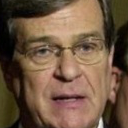

In [16]:
central_128_crop(img)